***Clustering***

-- A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group.
It is an unsupervised learning method .

Types --

* Feature_reduction_techniques --- 

 * PCA 
 * LDA

* Observation_reduction_techniques --- 
 * K-mean clustering
 * Density-Based Clustering
 * Hierarchical Clustering
 * ...

#### Data preparation

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy as sch
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

In [2]:
# mounting with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data

video_data = pd.read_csv("/content/drive/MyDrive/Project/eda_video1.csv")
toy_data   = pd.read_csv("/content/drive/MyDrive/Project/eda_toy1.csv")

In [4]:
from IPython.display import display

# first 2 rows
print("**************************** video_data ***************************************\n")
display(video_data.head(2))
print("**************************** Toy_data ***************************************\n")
display(toy_data.head(2))

**************************** video_data ***************************************



,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


**************************** Toy_data ***************************************



,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


In [5]:
video_df_1 = video_data.groupby(by="reviewerID")["overall","reviewPolarity"].mean()
toy_df_1 = toy_data.groupby(by="reviewerID")["overall","reviewPolarity"].mean()

In [6]:
# first 2 rows
print("**************************** video_data ***************************************\n")
display(video_df_1.head(2))
print("**************************** Toy_data ***************************************\n")
display(toy_df_1.head(2))

**************************** video_data ***************************************



,overall,reviewPolarity
reviewerID,,
A00263941WP7WCIL7AKWL,4.333333,0.146705
A005481137I9SCAWEF7ON,4.370370,0.098081


**************************** Toy_data ***************************************



,overall,reviewPolarity
reviewerID,,
A012468118FTQAINEI0OQ,5.0,0.267067
A0182108CPDLPRCXQUZQ,4.5,0.351146


In [7]:
# first 2 rows
print("**************************** video_data ***************************************\n")
display(video_df_1.shape)
print("**************************** Toy_data ***************************************\n")
display(toy_df_1.shape)

**************************** video_data ***************************************



(24295, 2)

**************************** Toy_data ***************************************



(19400, 2)

In [8]:
video_df = video_df_1.sample(n=10000,random_state=42,replace=False)# repeated rows
toy_df = toy_df_1.sample(n=10000,random_state=42,replace=False)# repeated rows

In [9]:
 # corelaation
corr1=video_df.corr()
corr1.style.background_gradient(cmap='coolwarm')

,overall,reviewPolarity
overall,1.000000,0.504624
reviewPolarity,0.504624,1.000000


In [10]:
 # corelaation
corr2 =toy_df.corr()
corr2.style.background_gradient(cmap='coolwarm')

,overall,reviewPolarity
overall,1.000000,0.409390
reviewPolarity,0.409390,1.000000


In [11]:
# Standardrizing data
from sklearn.preprocessing import StandardScaler # scaling the data

sc = StandardScaler()
data_scaled1 = sc.fit_transform(video_df)

data_scaled2 = sc.fit_transform(toy_df)

In [12]:
print(data_scaled1)
print("\n***********************************************\n")
print(data_scaled2)

[[ 0.55489494  0.92998934]
 [-0.38780264 -0.88102586]
 [-0.35413487 -0.23544877]
 ...
 [-0.43493752 -0.10836701]
 [-0.45513818 -0.38450469]
 [-0.38780264 -0.62197679]]

***********************************************

[[ 0.71979601  0.47531863]
 [-1.83331029  0.16701114]
 [-0.57445194 -0.72641028]
 ...
 [ 1.12424849 -0.07433614]
 [ 1.12424849  0.05412575]
 [ 0.14422901 -0.75252848]]


#### Video data

###### K-Mean 

Text(0.5, 1.0, 'Elbow curve')

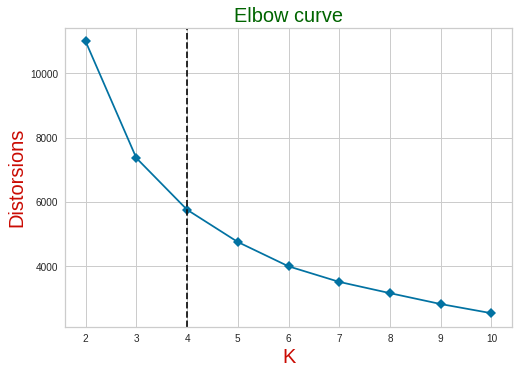

In [13]:
from yellowbrick.cluster import KElbowVisualizer
wss = []
for k in range(2, 12):
    Kmeans_model = KMeans(n_clusters=k)
    Kmeans_model.fit(data_scaled1)
    wss.append(Kmeans_model.inertia_)
KElbowVisualizer( Kmeans_model,timings=False,linewidth = 2 ).fit(data_scaled1)
plt.grid(True)
plt.xlabel('K',size = 20 , color = "r")
plt.ylabel('Distorsions',size = 20 , color = "r")
plt.title('Elbow curve',size =20,color = "darkgreen")

In [14]:
## Building K means clustering model with K = 4
km_model = KMeans(n_clusters = 4)
km_model.fit(data_scaled1)

KMeans(n_clusters=4)

2    3977
1    3080
3    1957
0     986
dtype: int64


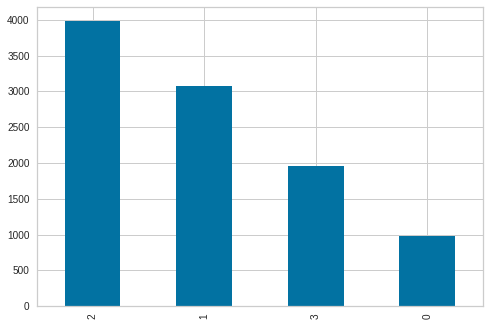

In [15]:
# Number of observations in each cluster

print(pd.Series(km_model.labels_).value_counts())
pd.Series(km_model.labels_).value_counts().plot( kind= 'bar')
plt.show()

In [16]:
# Adding cluster labels with data 

df_pair_plot11=pd.DataFrame(video_df[["overall","reviewPolarity"]])
df_pair_plot11['Km_cluster'] = km_model.labels_
df_pair_plot11.head()

,overall,reviewPolarity,Km_cluster
reviewerID,,,
A221VUXJJSSFZK,4.500000,0.216084,3
AKNT1ZQ7KN2ON,3.833333,0.013631,1
A1KJS7QLDAC2GB,3.857143,0.085800,1
AFNOT3Z22PRZI,4.600000,0.173207,2
A2I651ZQRUAMXW,5.000000,0.177247,2


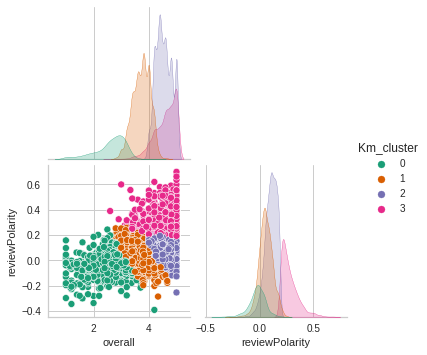

In [17]:
 # pair wise relationship of components on the data
sns.pairplot(df_pair_plot11, hue='Km_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

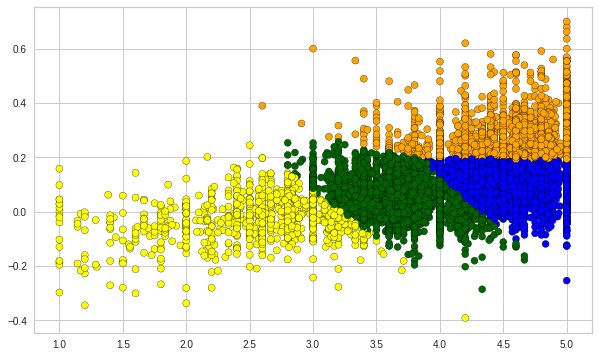

In [18]:
# plotting 4 clusters
s1 = video_df.loc[:,"reviewPolarity"]
f1 = video_df.loc[:,"overall"]

color_map={0:'yellow',1:'darkgreen',2:'blue',3:"orange",4:"green"}
label_color=[color_map[l] for l in km_model.labels_]
plt.figure(figsize=(10,6))
plt.scatter(f1,s1, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

Evaluate Model Performance — Mean Silhouette Coefficient ----

The Silhouette Coefficient is bounded between 1 and -1. The best value is 1, the worst is -1. A higher score indicates that the model has better defined, more dense clusters. Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters.



Two scores are used to calculate the silhouette coefficient:
* a: The average distance between one data point and all other points in the same cluster

* b: The average distance between one data point and all other points in the next nearest cluster.


\begin{align}
        \text{S = } & \left.(b - a) \middle/ max(a , b) \right. \\[1em]
    \end{align}

In [19]:
from sklearn import metrics
k_m11 = metrics.silhouette_score(df_pair_plot11, df_pair_plot11['Km_cluster'])
print("silhouette_score for kmean clustering =",k_m11)

silhouette_score for kmean clustering = 0.6734792151677639


###### AgglomerativeClustering

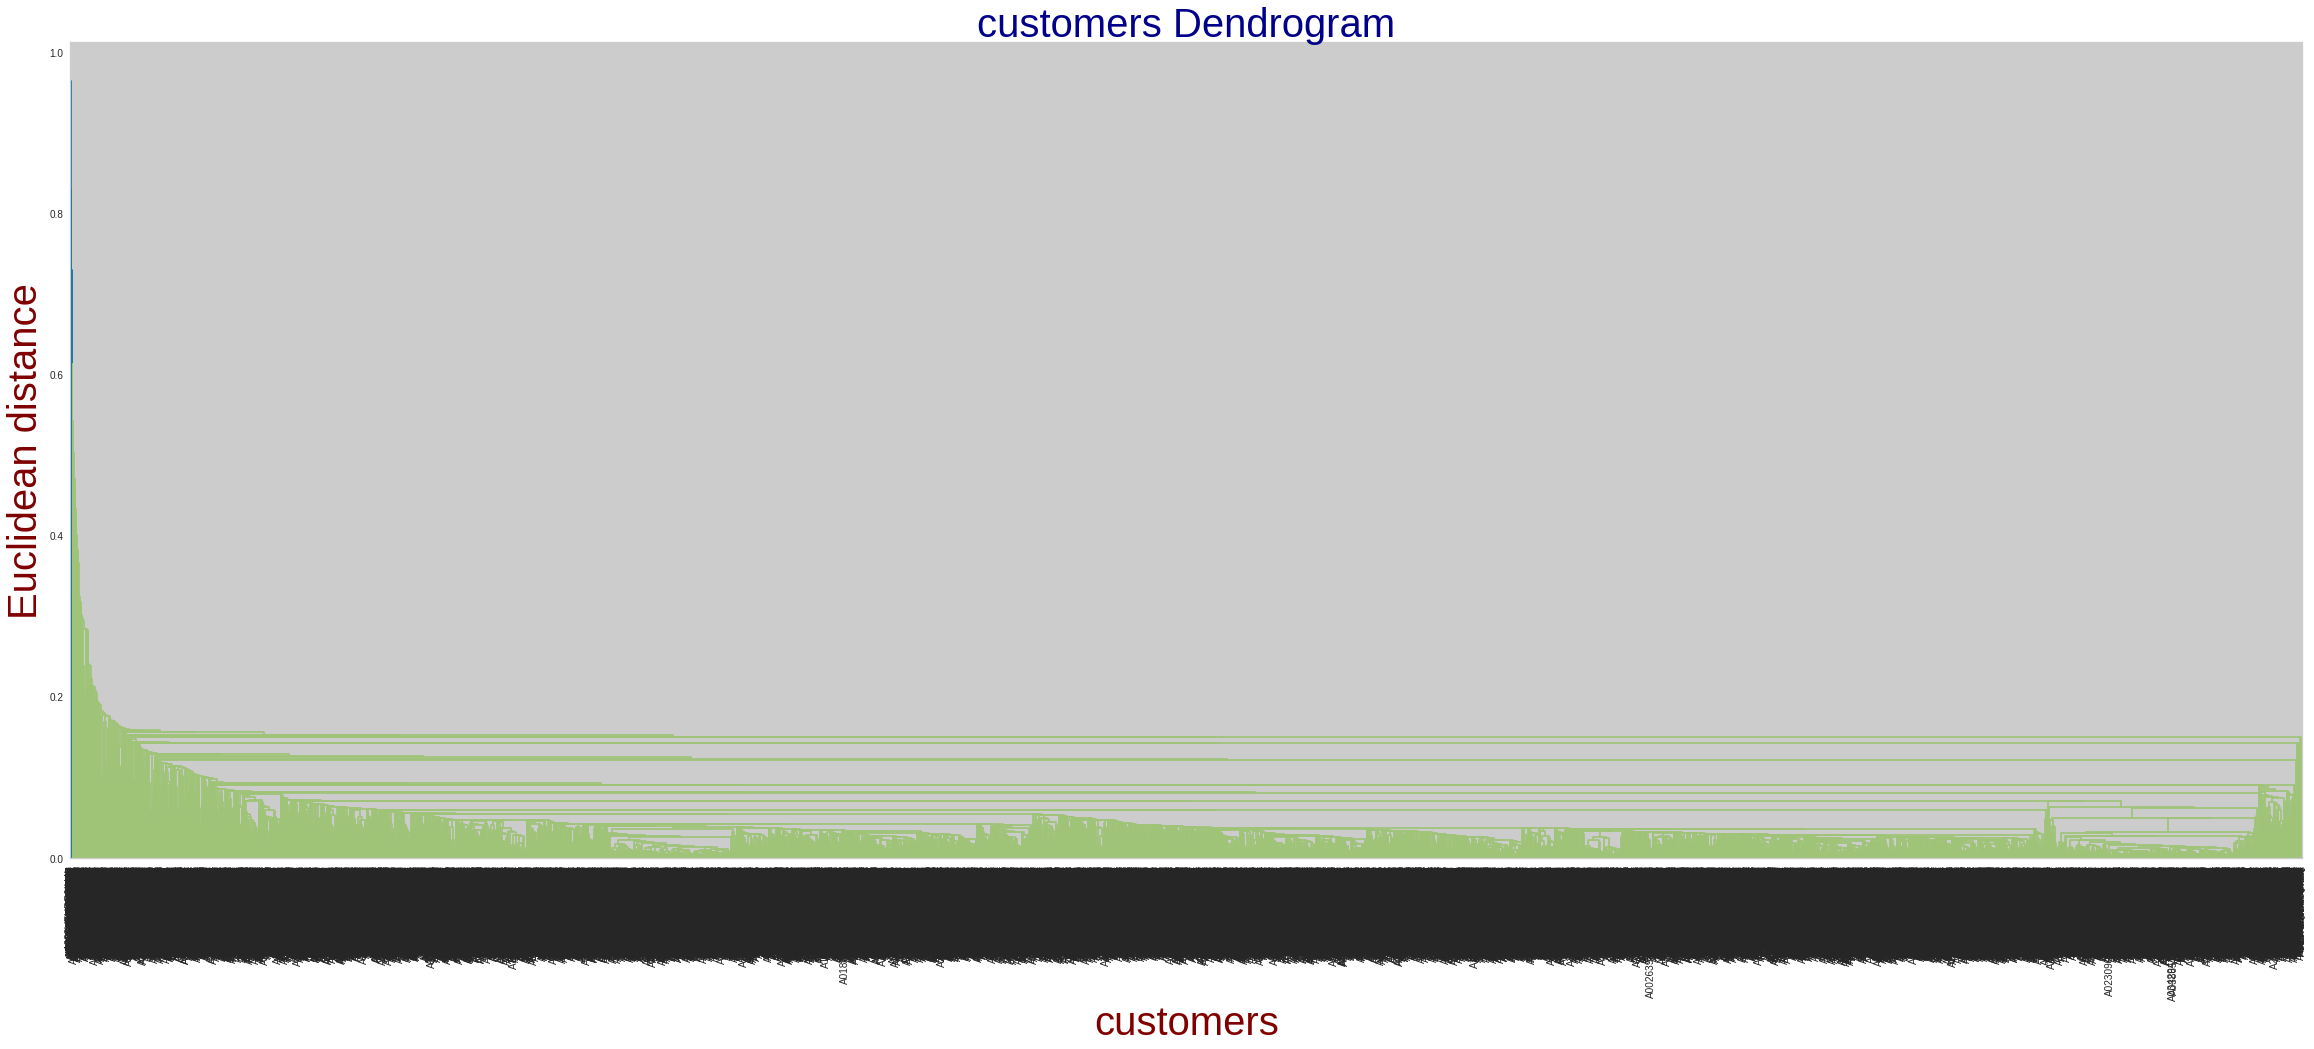

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering  # BOTTOM UP APPRAOACH (hierarchical clustering)

# Plotting Dendogram (hierarchical clustering)
plt.figure(figsize=(40, 15))
dendrogrm = sch.dendrogram(sch.linkage(data_scaled1,method='single'),labels=video_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('customers Dendrogram',fontsize=40,color = "darkblue")
plt.xlabel('customers',fontsize=40, color = "maroon")
plt.ylabel('Euclidean distance', fontsize=40,color = "maroon")
plt.show()

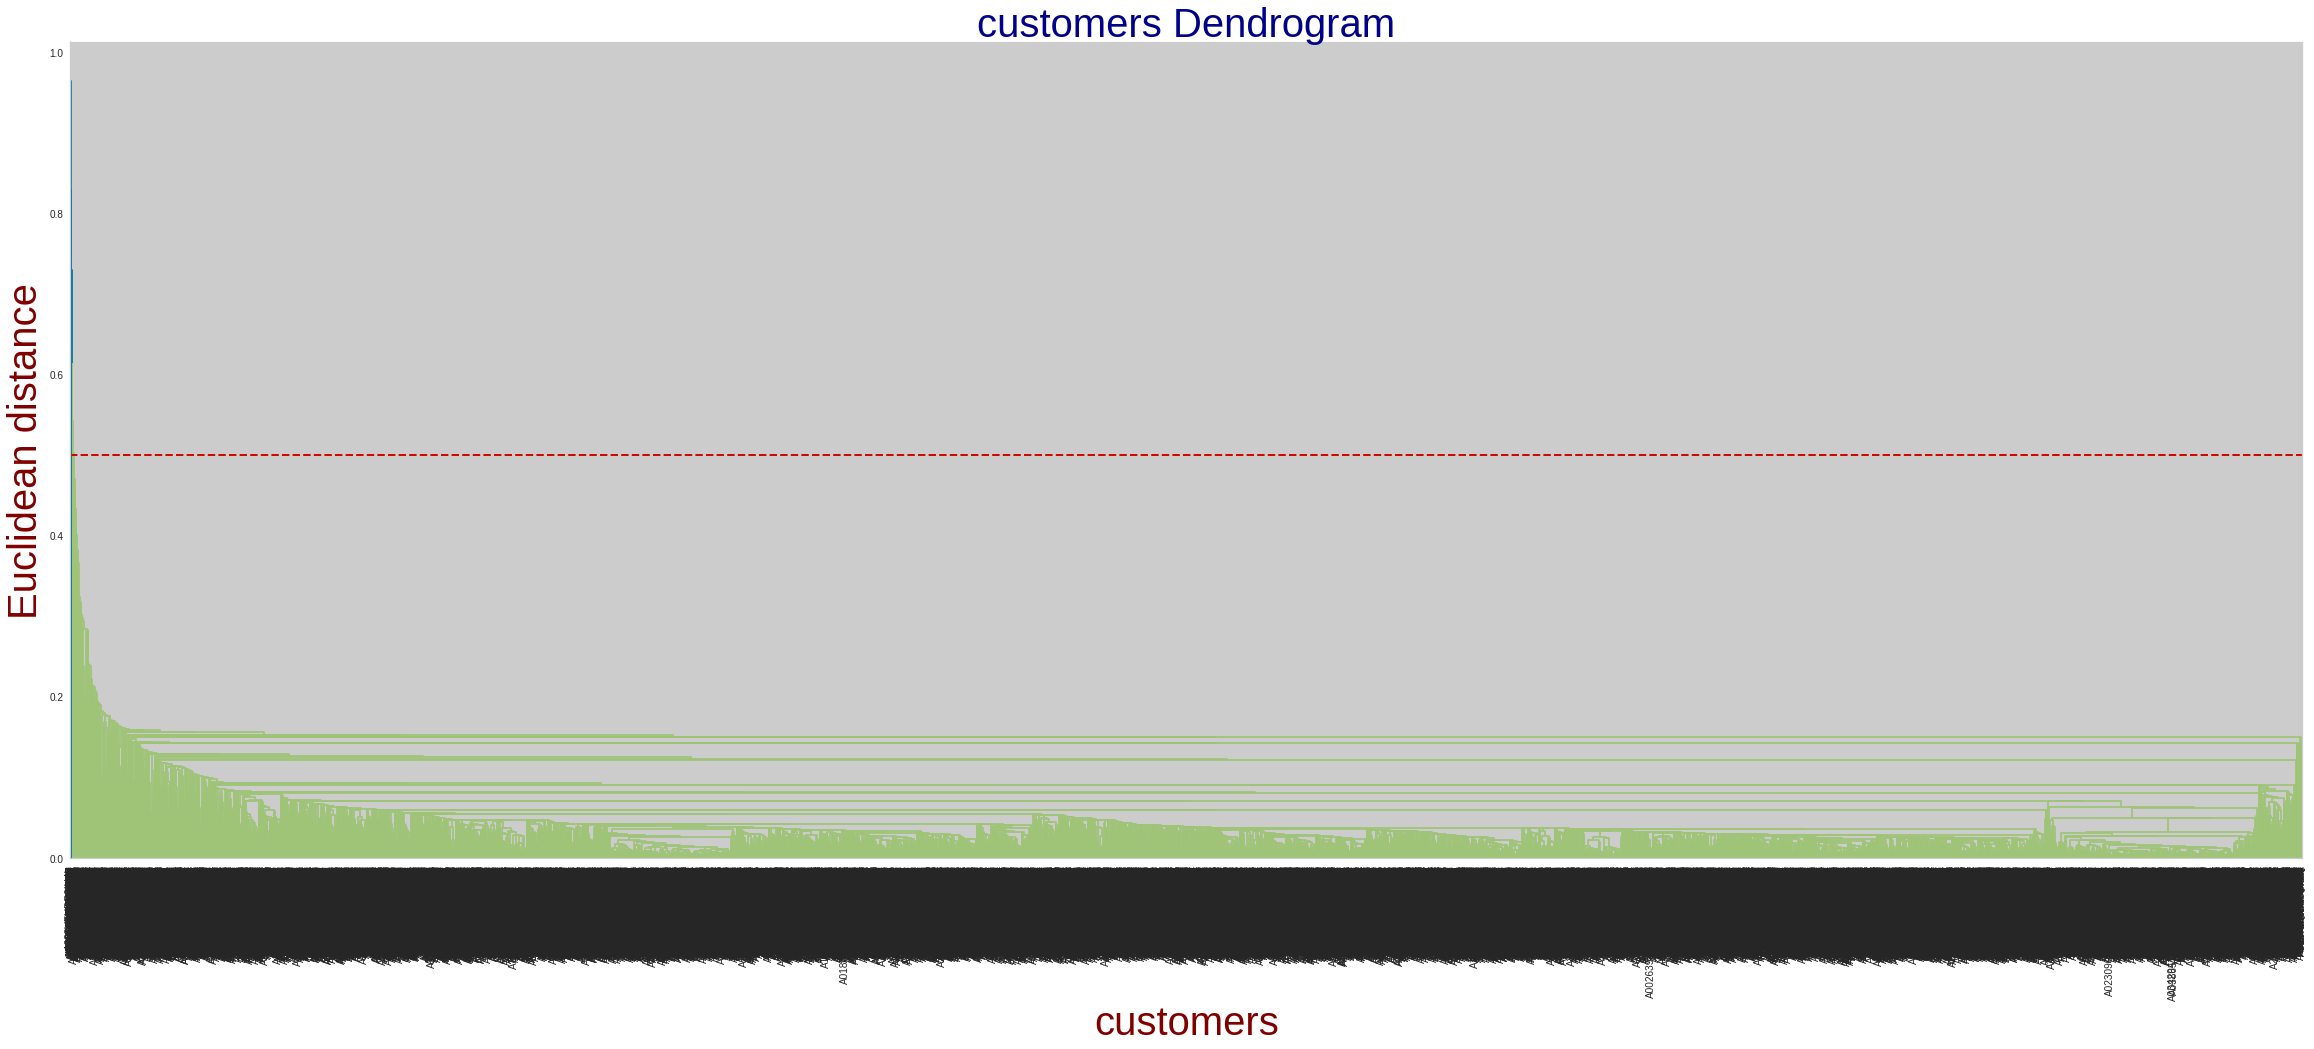

In [21]:
# Plotting Dendogram (hierarchical clustering)
plt.figure(figsize=(40, 15))
dendrogrm = sch.dendrogram(sch.linkage(data_scaled1,method='single'),labels=video_df.index)
ax = plt.gca()
plt.axhline(y = .50, color='r', linestyle='--',lw = 2)
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('customers Dendrogram',fontsize=40,color = "darkblue")
plt.xlabel('customers',fontsize=40, color = "maroon")
plt.ylabel('Euclidean distance', fontsize=40,color = "maroon")
plt.show()

In [22]:
hc1= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc1=hc1.fit(video_df)

In [23]:
# Adding cluster labels with data 

df_pair_plot12=pd.DataFrame(video_df[["overall","reviewPolarity"]])
df_pair_plot12['hc_cluster']=y_hc1.labels_
df_pair_plot12.head()

,overall,reviewPolarity,hc_cluster
reviewerID,,,
A221VUXJJSSFZK,4.500000,0.216084,1
AKNT1ZQ7KN2ON,3.833333,0.013631,1
A1KJS7QLDAC2GB,3.857143,0.085800,1
AFNOT3Z22PRZI,4.600000,0.173207,2
A2I651ZQRUAMXW,5.000000,0.177247,2


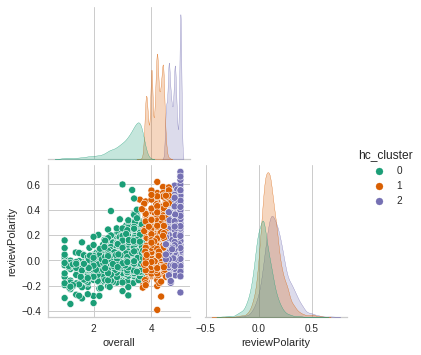

In [24]:
 # pair wise relationship of components on the data
sns.pairplot(df_pair_plot12, hue='hc_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

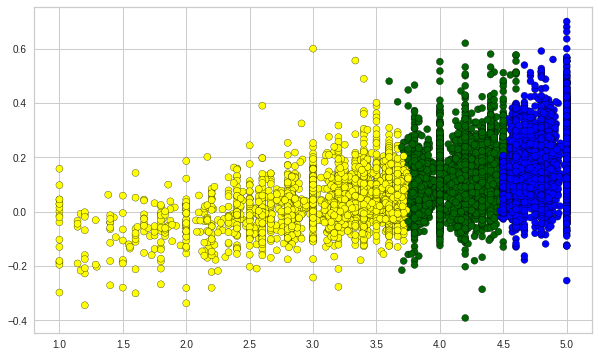

In [25]:
color_map={0:'yellow',1:'darkgreen',2:'blue',3:"orange",4:"green",5:"maroon"}
label_color=[color_map[l] for l in y_hc1.labels_]
plt.figure(figsize=(10,6))
plt.scatter(f1,s1, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

In [26]:
k_m12 = metrics.silhouette_score(df_pair_plot12, df_pair_plot12['hc_cluster'])
print("silhouette_score for Agglomerative hierarchical clustering =",k_m12)

silhouette_score for Agglomerative hierarchical clustering = 0.7307987320611884


This Agglomerative hierarchical clustering can not be use as a final model decause the dendogram is not clear.

###### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Model

In [27]:
from sklearn.neighbors import NearestNeighbors

neigh1 = NearestNeighbors(n_neighbors = 4)
nbrs1 = neigh1.fit(data_scaled1)

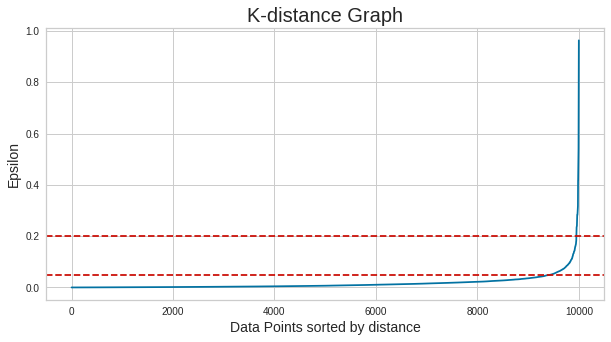

In [28]:
  # Plotting K-distance Graph
distances, indices = nbrs1.kneighbors(data_scaled1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]


plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [29]:
for eps in np.arange(0.05,0.21,.01):
  for min_samples in np.arange(60,70):
      clusterer = DBSCAN(eps=eps, min_samples=min_samples)
      cluster_labels = clusterer.fit_predict(data_scaled1)
      x= cluster_labels +2
      y = np.bincount(x)
      ii = np.nonzero(y)[0]
      results = list(zip(ii,y[ii]) )
      print(10*"*=*=*=")
      print('\neps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  60 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  61 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  62 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  63 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  64 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  65 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  66 | obtained clustering:  [(1, 10000)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  67 | obtained cl

 When minimum sample = 67 and eps= 0.13 we get the best clusters

In [30]:
# model Creation
dbscan_opt1=DBSCAN(eps = 0.13,min_samples=67)
dbscan_opt1.fit(data_scaled1)

DBSCAN(eps=0.13, min_samples=67)

 0    6289
-1    3711
dtype: int64


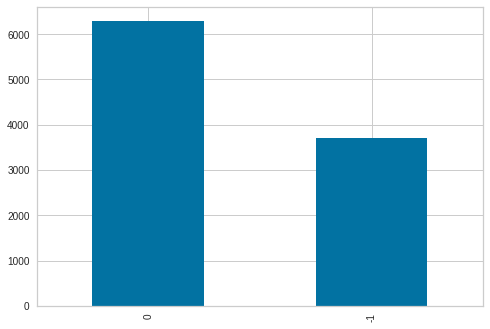

In [31]:
# Number of observations in each cluster

print(pd.Series(dbscan_opt1.labels_).value_counts())
pd.Series(dbscan_opt1.labels_).value_counts().plot( kind= 'bar')
plt.show()

In [32]:
# Adding cluster labels with data 

df_pair_plot13 = pd.DataFrame(video_df[["overall","reviewPolarity"]])
df_pair_plot13['dbscan_cluster']=dbscan_opt1.labels_
df_pair_plot13.head()

,overall,reviewPolarity,dbscan_cluster
reviewerID,,,
A221VUXJJSSFZK,4.500000,0.216084,0
AKNT1ZQ7KN2ON,3.833333,0.013631,0
A1KJS7QLDAC2GB,3.857143,0.085800,0
AFNOT3Z22PRZI,4.600000,0.173207,0
A2I651ZQRUAMXW,5.000000,0.177247,0


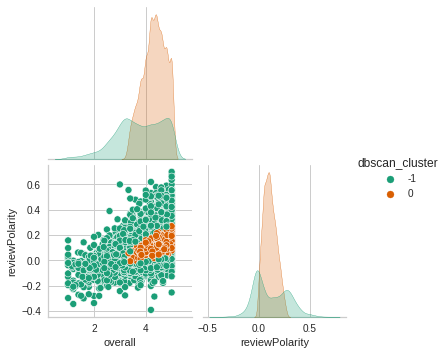

In [33]:
 # pair wise relationship of components on the data
sns.pairplot(df_pair_plot13, hue='dbscan_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

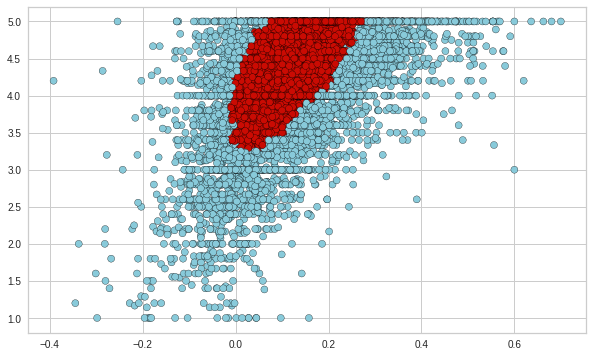

In [34]:
# plotting 3 clusters

color_map={-1:"c",0:'r',1:'darkgreen',2:'blue',3:"orange"}
label_color=[color_map[l] for l in dbscan_opt1.labels_]
plt.figure(figsize=(10,6))
plt.scatter(s1,f1, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

In [35]:
K_m13 = metrics.silhouette_score(df_pair_plot13, df_pair_plot13['dbscan_cluster'])
print("silhouette_score for DBSCAN clustering =",K_m13)

silhouette_score for DBSCAN clustering = 0.5013634113170047


#### Toy and Games

##### K-Mean

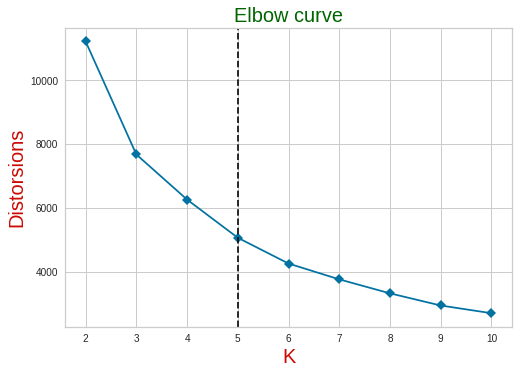

In [36]:
from yellowbrick.cluster import KElbowVisualizer
wss = []
for k in range(2, 12):
    Kmeans_model = KMeans(n_clusters=k)
    Kmeans_model.fit(data_scaled2)
    wss.append(Kmeans_model.inertia_)
KElbowVisualizer( Kmeans_model,timings=False,linewidth = 2 ).fit(data_scaled2)
plt.grid(True)
plt.xlabel('K',size = 20 , color = "r")
plt.ylabel('Distorsions',size = 20 , color = "r")
plt.title('Elbow curve',size =20,color = "darkgreen")
plt.show()

In [37]:
## Building K means clustering model with K = 5

km_model21 = KMeans(n_clusters = 5)
km_model21.fit(data_scaled2)

KMeans(n_clusters=5)

4    3043
0    2333
3    1960
1    1658
2    1006
dtype: int64


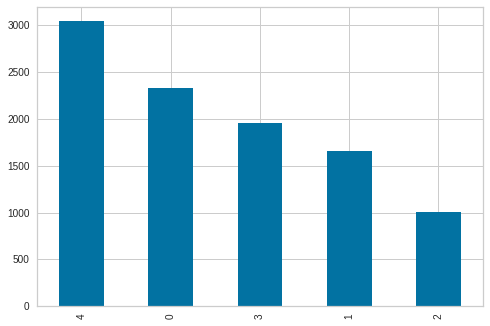

In [38]:
# Number of observations in each cluster

print(pd.Series(km_model21.labels_).value_counts())
pd.Series(km_model21.labels_).value_counts().plot( kind= 'bar')
plt.show()

In [39]:
# Adding cluster labels with data 

df_pair_plot21 = pd.DataFrame(toy_df[["overall","reviewPolarity"]])
df_pair_plot21['Km_cluster']=km_model21.labels_
df_pair_plot21.head()

,overall,reviewPolarity,Km_cluster
reviewerID,,,
A12Q1DFSKXYC8A,4.777778,0.288688,4
AQ0Y2DX63QGNB,3.375000,0.253299,0
A3USG4MPQ3MI6L,4.066667,0.150746,0
A1PX1X3FCQWDL3,2.200000,-0.028490,2
A24JXEI73MFXLP,4.000000,0.394966,1


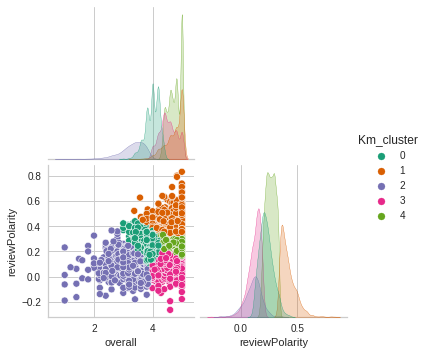

In [40]:
# pair wise relationship of components on the data

sns.pairplot(df_pair_plot21, hue='Km_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

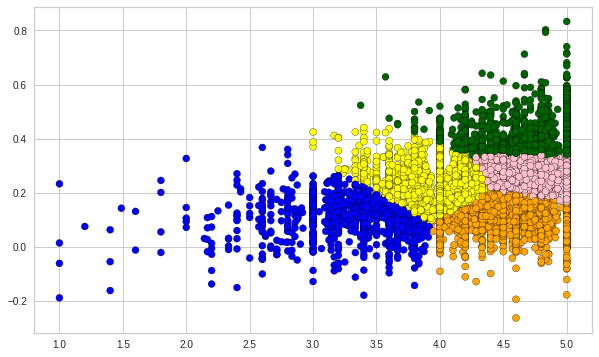

In [41]:
# plotting 5 clusters
s2 = toy_df.loc[:,"reviewPolarity"]
f2 = toy_df.loc[:,"overall"]
color_map={0:'yellow',1:'darkgreen',2:'blue',3:"orange",4:"pink"}
label_color=[color_map[l] for l in km_model21.labels_]
plt.figure(figsize=(10,6))
plt.scatter(f2,s2, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

In [42]:
K_m21 = metrics.silhouette_score(df_pair_plot21, df_pair_plot21['Km_cluster'])
print("silhouette_score for Kmean clustering =",K_m21)

silhouette_score for Kmean clustering = 0.7428922884965059


##### Agglomerative Clustering

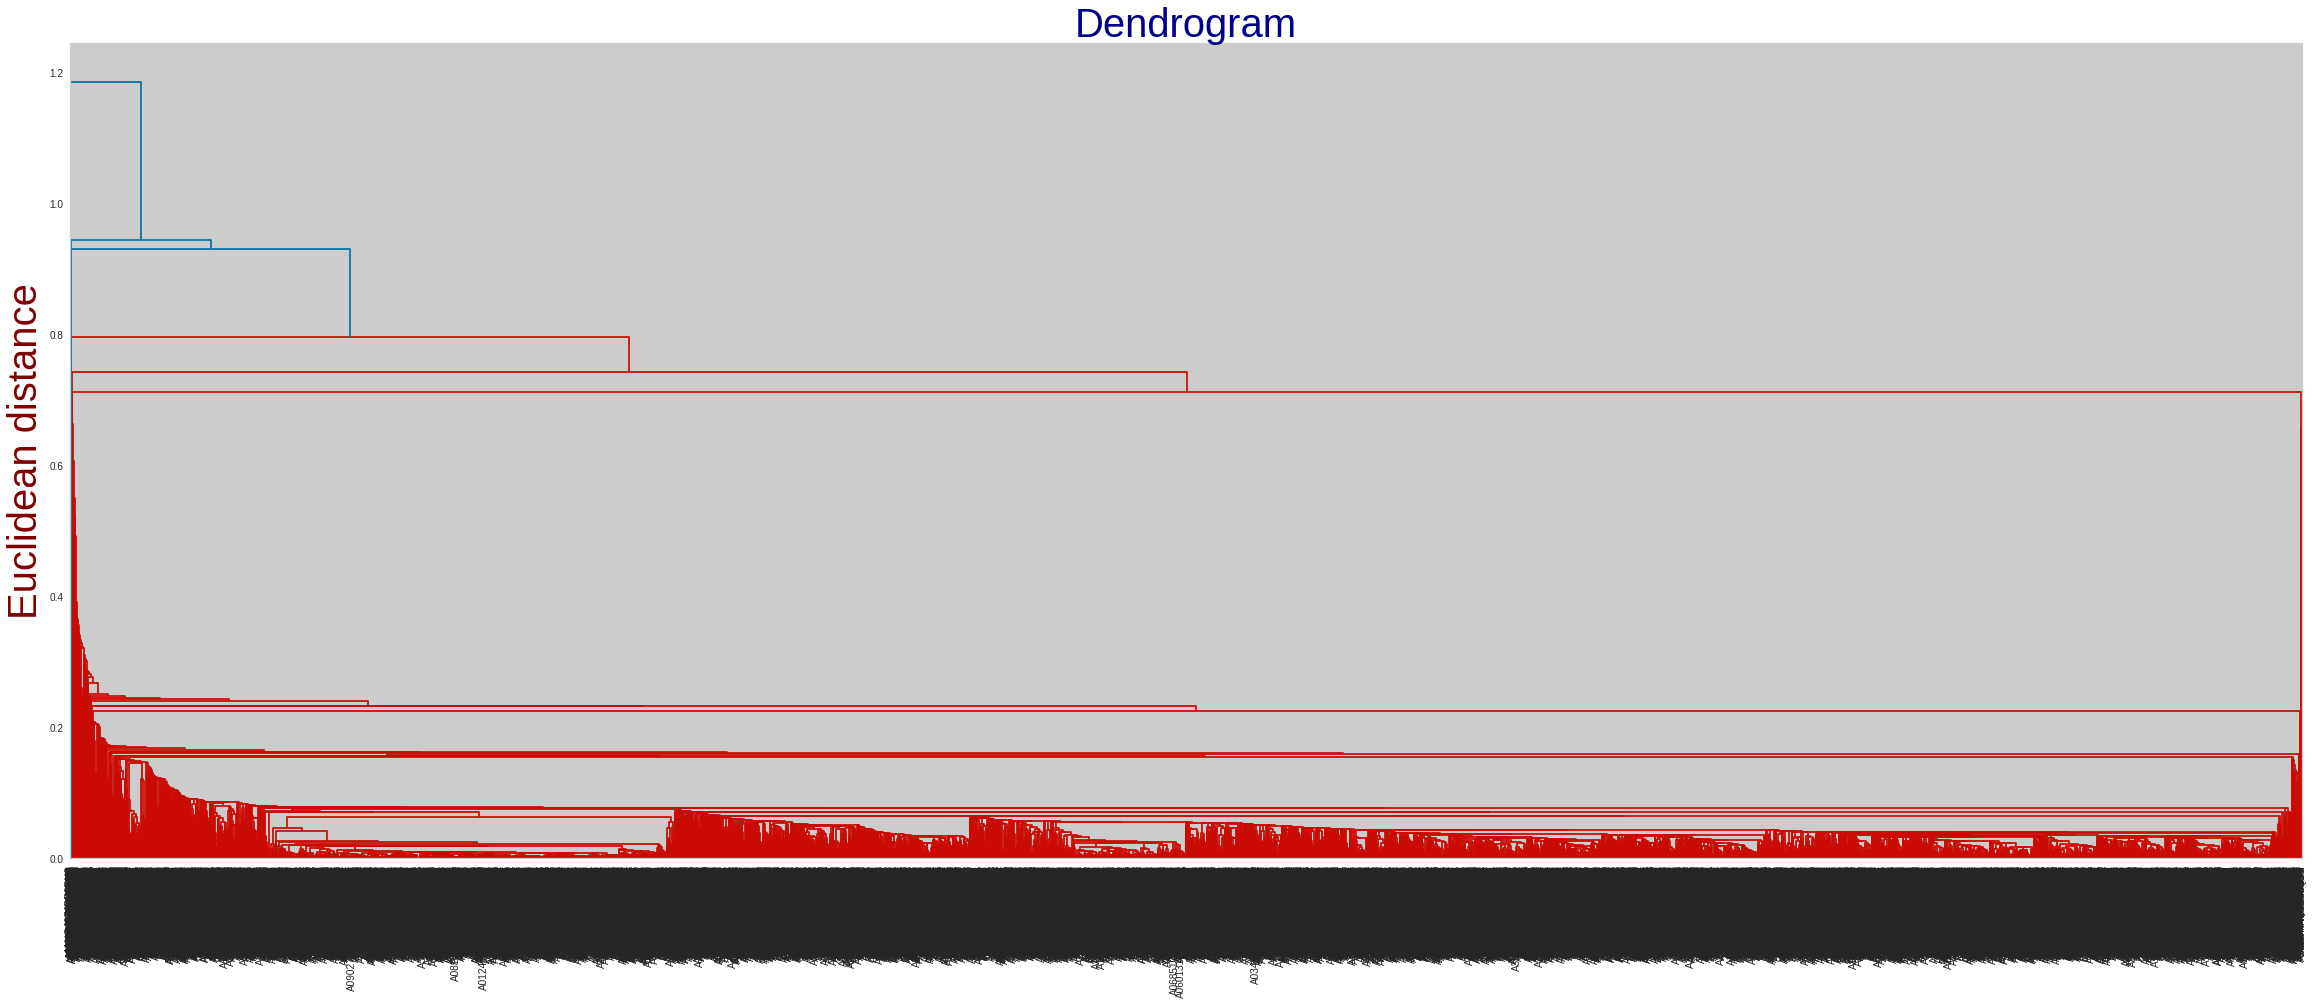

In [43]:
# Plotting Dendogram (hierarchical clustering)
plt.figure(figsize=(40, 15))
dendrogrm = sch.dendrogram(sch.linkage(data_scaled2,method='single'),labels=toy_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=40,color = "darkblue")
plt.ylabel('Euclidean distance', fontsize=40,color = "maroon")
plt.show()

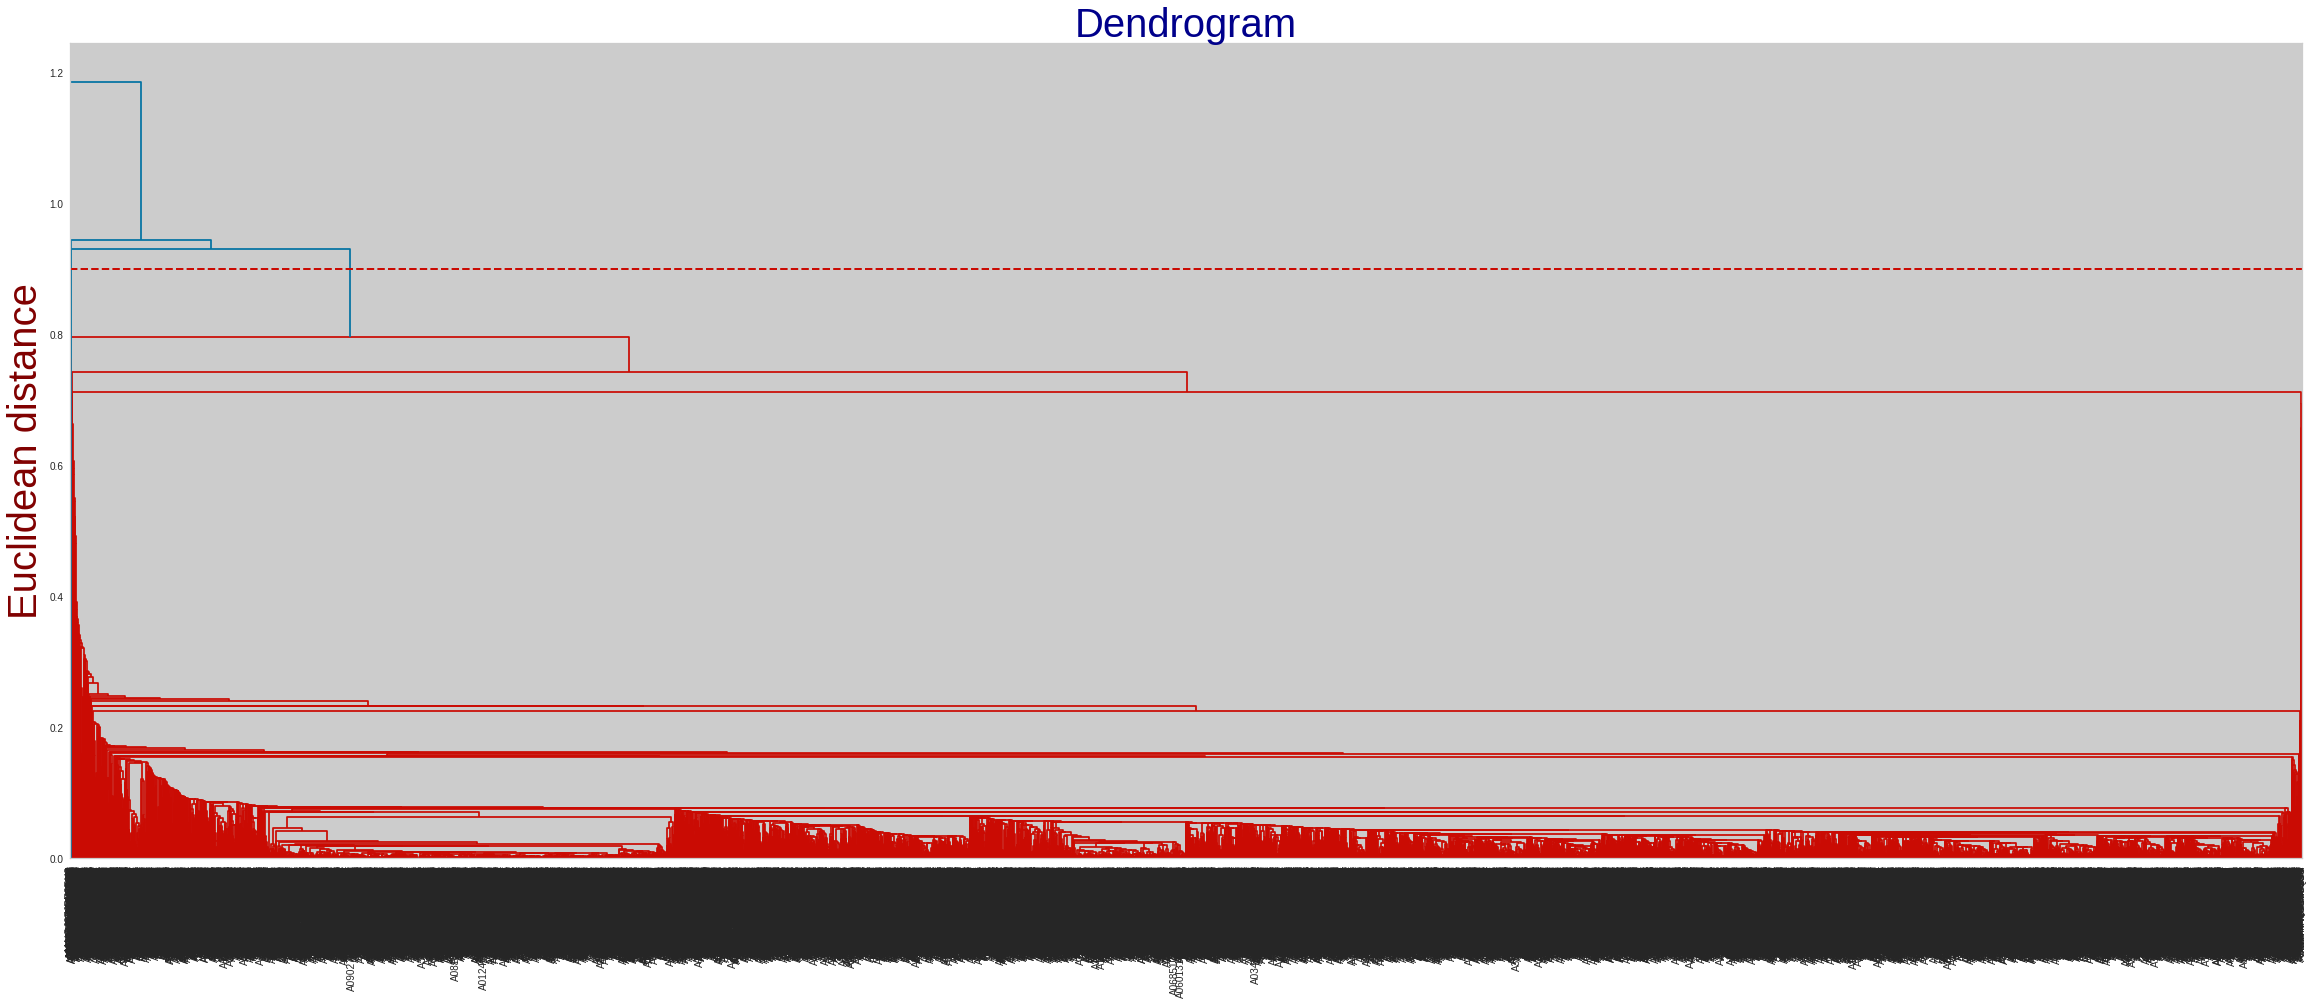

In [44]:
# Plotting Dendogram (hierarchical clustering)
plt.figure(figsize=(40, 15))
dendrogrm = sch.dendrogram(sch.linkage(data_scaled2,method='single'),labels=toy_df.index)
ax = plt.gca()
plt.axhline(y = 0.9, color='r', linestyle='--',lw = 2)
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=40,color = "darkblue")
plt.ylabel('Euclidean distance', fontsize=40,color = "maroon")
plt.show()

In [45]:
hc2 = AgglomerativeClustering(n_clusters= 2,affinity='euclidean',linkage='ward')
y_hc2 = hc2.fit(toy_df)

0    5031
1    4969
dtype: int64


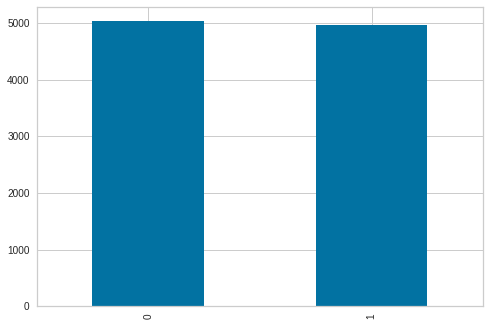

In [46]:
# Number of observations in each cluster

print(pd.Series(y_hc2.labels_).value_counts())
pd.Series(y_hc2.labels_).value_counts().plot( kind= 'bar')
plt.show()

In [47]:
# Adding cluster labels with data 

df_pair_plot22=pd.DataFrame(toy_df[["overall","reviewPolarity"]])
df_pair_plot22['hc_cluster']=y_hc2.labels_
df_pair_plot22.head()

,overall,reviewPolarity,hc_cluster
reviewerID,,,
A12Q1DFSKXYC8A,4.777778,0.288688,1
AQ0Y2DX63QGNB,3.375000,0.253299,0
A3USG4MPQ3MI6L,4.066667,0.150746,0
A1PX1X3FCQWDL3,2.200000,-0.028490,0
A24JXEI73MFXLP,4.000000,0.394966,0


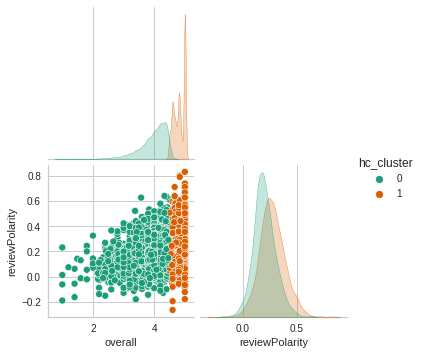

In [48]:
# pair wise relationship of components on the data

sns.pairplot(df_pair_plot22, hue='hc_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

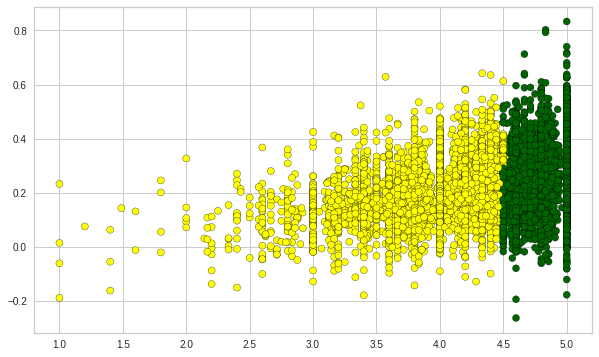

In [49]:
color_map={0:'yellow',1:'darkgreen',2:'blue',3:"orange",4:"pink",5:"maroon"}
label_color=[color_map[l] for l in y_hc2.labels_]
plt.figure(figsize=(10,6))
plt.scatter(f2,s2, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

In [50]:
K_m22 = metrics.silhouette_score(df_pair_plot22, df_pair_plot22['hc_cluster'])
print("silhouette_score for Agglomerative Clustering =",K_m22)

silhouette_score for Agglomerative Clustering = 0.7230962983125186


This Agglomerative hierarchical clustering can not be use as a final model decause the dendogram is not clear.

##### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Model

In [51]:
from sklearn.neighbors import NearestNeighbors

neigh2 = NearestNeighbors(n_neighbors = 4)
nbrs2 = neigh2.fit(data_scaled2)

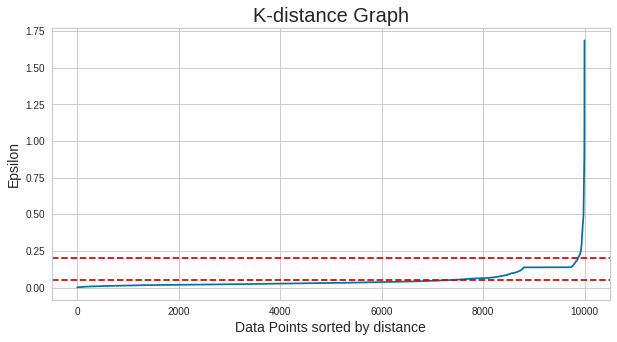

In [52]:
# Plotting K-distance Graph

distances, indices = nbrs2.kneighbors(data_scaled1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]


plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [53]:
for eps in np.arange(0.05,0.21,.01):
  for min_samples in np.arange(60,81):
      clusterer = DBSCAN(eps=eps, min_samples=min_samples)
      cluster_labels = clusterer.fit_predict(data_scaled2)
      x= cluster_labels +2
      y = np.bincount(x)
      ii = np.nonzero(y)[0]
      results = list(zip(ii,y[ii]) )
      print(10*"*=*=*=")
      print('\neps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  60 | obtained clustering:  [(1, 9055), (2, 757), (3, 188)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  61 | obtained clustering:  [(1, 9063), (2, 614), (3, 185), (4, 113), (5, 25)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  62 | obtained clustering:  [(1, 9065), (2, 614), (3, 184), (4, 73), (5, 39), (6, 25)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  63 | obtained clustering:  [(1, 9115), (2, 614), (3, 183), (4, 63), (5, 25)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  64 | obtained clustering:  [(1, 9164), (2, 614), (3, 172), (4, 50)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

eps= 0.05 | min_samples=  65 | obtained clustering:  [(1, 9175), (2, 588), (3, 168), (4, 69)]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

In [54]:
# model Creation
dbscan_opt2=DBSCAN(eps = 0.15,min_samples=80)
dbscan_opt2.fit(data_scaled2)

DBSCAN(eps=0.15, min_samples=80)

 0    6713
-1    3287
dtype: int64


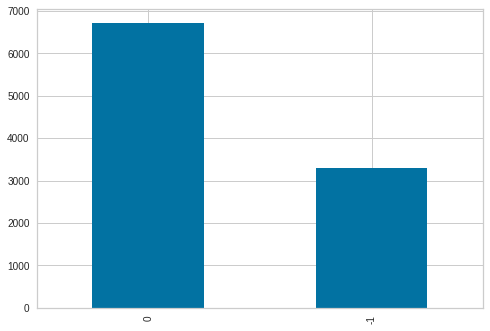

In [55]:
# Number of observations in each cluster

print(pd.Series(dbscan_opt2.labels_).value_counts())
pd.Series(dbscan_opt2.labels_).value_counts().plot( kind= 'bar')
plt.show()

In [56]:
# Adding cluster labels with data 

df_pair_plot23=pd.DataFrame(toy_df[["overall","reviewPolarity"]])
df_pair_plot23['dbscan_cluster']=dbscan_opt2.labels_
df_pair_plot23.head()

,overall,reviewPolarity,dbscan_cluster
reviewerID,,,
A12Q1DFSKXYC8A,4.777778,0.288688,0
AQ0Y2DX63QGNB,3.375000,0.253299,-1
A3USG4MPQ3MI6L,4.066667,0.150746,0
A1PX1X3FCQWDL3,2.200000,-0.028490,-1
A24JXEI73MFXLP,4.000000,0.394966,-1


In [57]:

#df_pair_plot23.drop(columns=["Cluster","dbscan_cluster"],axis=1,inplace=True)

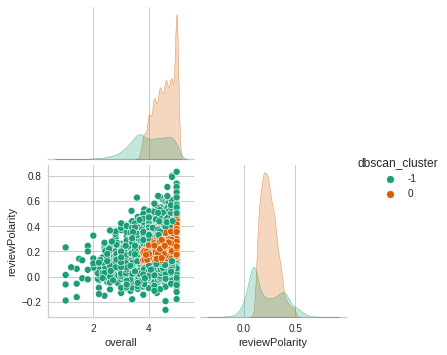

In [58]:
 # pair wise relationship of components on the data
sns.pairplot(df_pair_plot23, hue='dbscan_cluster', palette= 'Dark2', diag_kind='kde',corner=True)
plt.show()

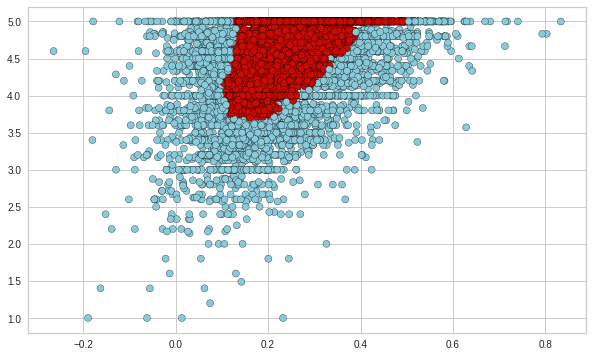

In [59]:
# plotting  clusters

color_map={-1:"c",0:'r',1:'darkgreen',2:'blue',3:"orange",4:"pink"}
label_color=[color_map[l] for l in dbscan_opt2.labels_]
plt.figure(figsize=(10,6))
plt.scatter(s2,f2, c=label_color ,cmap='Spectral',edgecolors = "black")
plt.show()

In [60]:
K_m23 = metrics.silhouette_score(df_pair_plot23, df_pair_plot23['dbscan_cluster'])
print("silhouette_score for DBSCAN Clustering =",K_m23)

silhouette_score for DBSCAN Clustering = 0.5772929457854791


#### Evaluation

##### Video Games Data

In [61]:
print(5*"*","Main data",5*"*")
print("\n",5*"*","kmean clustering",5*"*")
print(df_pair_plot11['Km_cluster'].value_counts())
print("\n",5*"*","alggo. clustering",5*"*")
print(df_pair_plot12['hc_cluster'].value_counts())
print("\n",5*"*","alggo. clustering",5*"*")
print(df_pair_plot13['dbscan_cluster'].value_counts())

***** Main data *****

 ***** kmean clustering *****
2    3977
1    3080
3    1957
0     986
Name: Km_cluster, dtype: int64

 ***** alggo. clustering *****
1    4053
2    3420
0    2527
Name: hc_cluster, dtype: int64

 ***** alggo. clustering *****
 0    6289
-1    3711
Name: dbscan_cluster, dtype: int64


In [62]:
# creating function to plot performance for comparison 

def plot_s(x1,y1,z1,k1):
    
    for bar in x1.patches:
        plt.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height())
                     , ha='center', va='center',size=15, xytext=(0, 4),textcoords='offset points')
    # Setting the label for x-axis
    plt.xlabel(y1, size=14)

    # Setting the label for y-axis
    plt.ylabel(z1, size=20)

    # Setting the title for the graph
    plt.title(k1,size=20)

    # Finally showing the plot
    plt.show()

In [63]:
models2 = pd.DataFrame({"Clusters_number":["First","Second","Third","Fourth"],"K_mean":[3969,3085,1959,987],
                        "Agglomerative":[4053,3420,2527,0],
                        "dbscan":[6289,3711,0,0]})

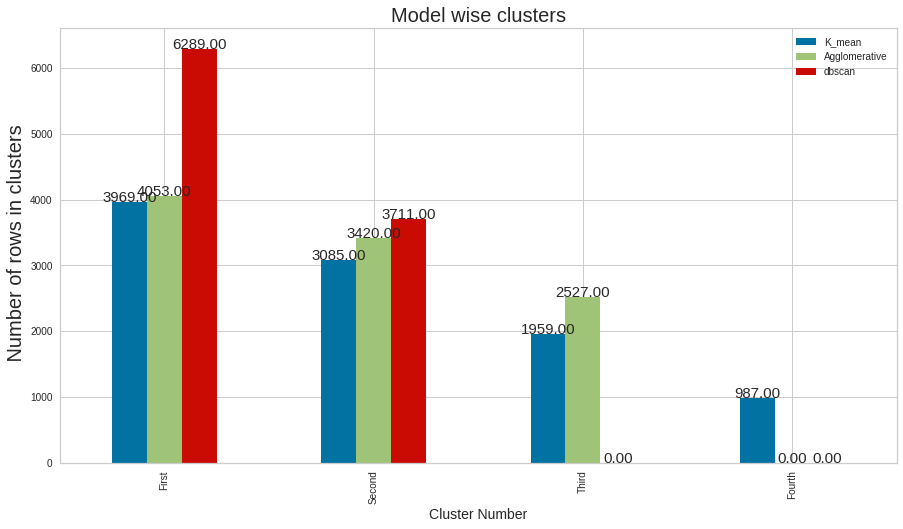

In [64]:
fig,ax1= plt.subplots(1,1,figsize=(15,8)) 
x2=models2.plot(x="Clusters_number", y=["K_mean","Agglomerative","dbscan"], kind="bar",ax=ax1)

plot_s(x2,"Cluster Number"," Number of rows in clusters","Model wise clusters")

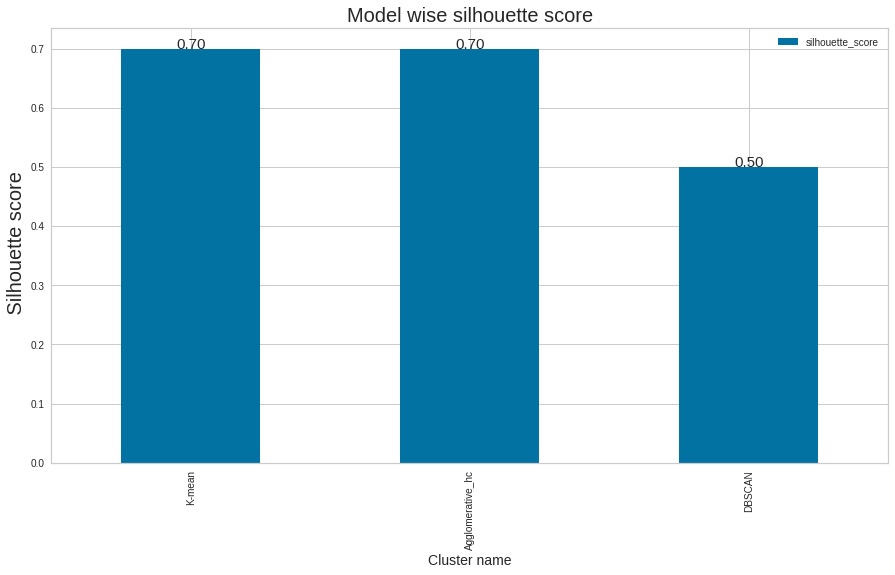

In [65]:
k_m1 = metrics.silhouette_score(df_pair_plot11, df_pair_plot11['Km_cluster'])
h_c1 = metrics.silhouette_score(df_pair_plot12, df_pair_plot12['hc_cluster'])
d_b1 = metrics.silhouette_score(df_pair_plot13, df_pair_plot13['dbscan_cluster'])

df_1 = pd.DataFrame({"Models":["K-mean","Agglomerative_hc","DBSCAN"],"silhouette_score":[round(k_m1,1),round(h_c1,1),round(d_b1,1)]})


fig,ax1= plt.subplots(1,1,figsize=(15,8)) 
x11=df_1.plot(x="Models", y=["silhouette_score"], kind="bar",ax=ax1)

plot_s(x11,"Cluster name"," Silhouette score","Model wise silhouette score")

In [66]:
# df_pair_plot11.to_csv("/content/drive/MyDrive/Untitled folder//video_cluster.csv")

 Conclusion--
 
We can see that in K mean clustering the distribution of the clusters are close to each other ,the silhouette_score for kmean and Agglomerative are so close to each other and we can also separate the rows as per similarity ,So we consider the k_men clustering as the best model .

In [67]:
kk1 = video_df.iloc[:,[0,1]]

In [68]:
# predicting values for k-mean

Kmeans_model = KMeans(n_clusters = 4)
y_km1 = Kmeans_model.fit_predict(kk1) 

In [69]:
# dataframe for  predicted values
m1 = pd.DataFrame({"y_KM":y_km1})

In [70]:
# separating index based on clusters
first_index1 = m1[m1["y_KM"] == 0].index
second_index1 = m1[m1["y_KM"] == 1].index
third_index1 = m1[m1["y_KM"] == 2].index
fourth_index1 = m1[m1["y_KM"] == 3].index

In [71]:
video_df.columns

Index(['overall', 'reviewPolarity'], dtype='object')

In [72]:
 # describe the data
video_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,10000.0,4.107584,0.707226,1.000000,3.732692,4.208818,4.615385,5.0
reviewPolarity,10000.0,0.112121,0.111795,-0.391864,0.040575,0.100940,0.172735,0.7


In [73]:
# printing values based on clusters

print(5*"******", "first_cluster",5*"******")
print(video_df.iloc[first_index1,[0,1]].head(10))
print(5*"******", "second_cluster",5*"******")
print(video_df.iloc[second_index1,[0,1]].head(10))
print(5*"******", "third_cluster",5*"******")
print(video_df.iloc[third_index1,[0,1]].head(10))
print(5*"******", "Fourth_cluster",5*"******")
print(video_df.iloc[fourth_index1,[0,1]].head(10))


****************************** first_cluster ******************************
                 overall  reviewPolarity
reviewerID                              
AFNOT3Z22PRZI   4.600000        0.173207
A2I651ZQRUAMXW  5.000000        0.177247
A181KZHEKPN96C  5.000000        0.078428
ASUJADILJ5UK8   5.000000        0.147003
A3LNL8VPBSMKPB  4.714286        0.099657
AFXN7YRQIBTP1   4.615385        0.142686
AZY1N2YRSROMQ   4.666667        0.114746
AU23IVEPBNZ4J   4.800000        0.201390
AMSOH6T6E3FSJ   4.833333        0.096409
A34J6E4NHBS7W9  4.888889        0.192940
****************************** second_cluster ******************************
                 overall  reviewPolarity
reviewerID                              
AKNT1ZQ7KN2ON   3.833333        0.013631
A1KJS7QLDAC2GB  3.857143        0.085800
A1HSAYB9K98OGX  3.571429        0.063633
A1PXJJLH2ZN5PN  3.583333        0.062957
A3CA3RWZYJDWXE  3.000000        0.009051
A2XF547TN94TX1  3.428571       -0.016136
A1PHDKFH72YBS6  3.545455   

Observations--

first_cluster = low sentiment,low rating

second_cluster = high sentiment,high rating

third_cluster = medium sentiment,high rating

fourth_cluster = low sentiment,medium rating

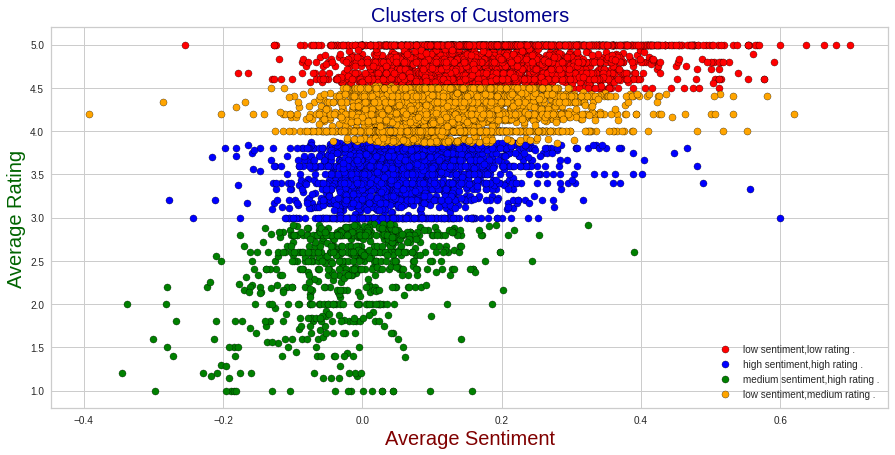

In [74]:
col = video_df.columns
plt.figure(figsize=(15,7))
plt.scatter(video_df.iloc[first_index1,1], video_df.iloc[first_index1,0], s = 50, c = 'red', label = 'low sentiment,low rating .',edgecolors = "black")
plt.scatter(video_df.iloc[second_index1, 1], video_df.iloc[second_index1, 0], s = 50, c = 'blue', label = 'high sentiment,high rating .',edgecolors = "black")
plt.scatter(video_df.iloc[third_index1, 1], video_df.iloc[third_index1, 0], s = 50, c = 'green', label = 'medium sentiment,high rating .',edgecolors = "black")
plt.scatter(video_df.iloc[fourth_index1, 1], video_df.iloc[fourth_index1, 0], s = 50, c = 'orange', label = 'low sentiment,medium rating .',edgecolors = "black")

plt.title('Clusters of Customers',fontsize=20,color = "darkblue")
plt.ylabel("Average Rating",fontsize=20,color = "darkgreen")
plt.xlabel("Average Sentiment",fontsize=20,color = "maroon")
plt.legend()
plt.show()

In [75]:
# df_pair_plot11.to_csv("/content/drive/MyDrive/Untitled folder//video_cluster.csv")

##### Toy and Games data

In [76]:
print(5*"*","Main data",5*"*")
print("\n",5*"*","kmean clustering",5*"*")
print(df_pair_plot21['Km_cluster'].value_counts())
print("\n",5*"*","alggo. clustering",5*"*")
print(df_pair_plot22['hc_cluster'].value_counts())
print("\n",5*"*","dbscan clustering",5*"*")
print(df_pair_plot23['dbscan_cluster'].value_counts())

***** Main data *****

 ***** kmean clustering *****
4    3043
0    2333
3    1960
1    1658
2    1006
Name: Km_cluster, dtype: int64

 ***** alggo. clustering *****
0    5031
1    4969
Name: hc_cluster, dtype: int64

 ***** dbscan clustering *****
 0    6713
-1    3287
Name: dbscan_cluster, dtype: int64


In [77]:
models2 = pd.DataFrame({"Clusters_number":["First","Second","Third","Fourth","Fifth"],"K_mean":df_pair_plot21['Km_cluster'].value_counts().values,"Agglomerative":
                       [5031,4969,0,0,0],"dbscan":[6713,3287,0,0,0]})

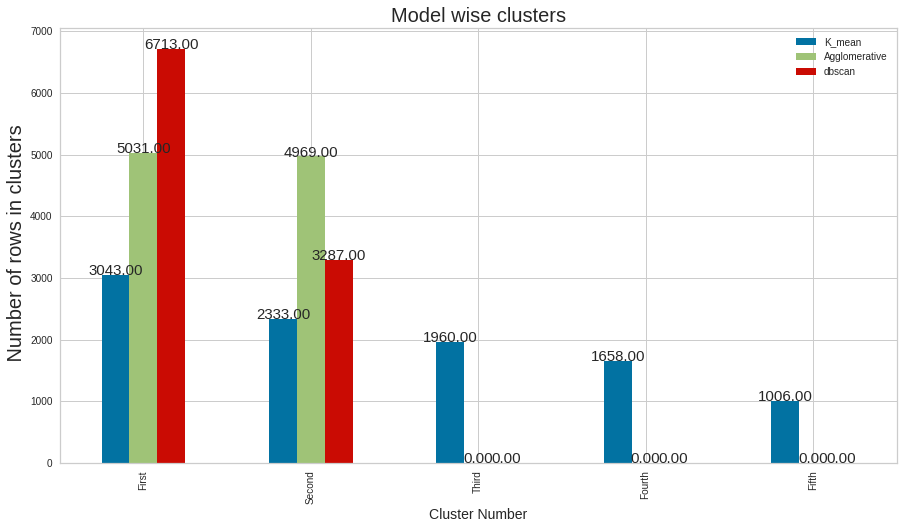

In [78]:
fig,ax1= plt.subplots(1,1,figsize=(15,8)) 
x3=models2.plot(x="Clusters_number", y=["K_mean","Agglomerative","dbscan"], kind="bar",ax=ax1)

plot_s(x3,"Cluster Number"," Number of rows in clusters","Model wise clusters")

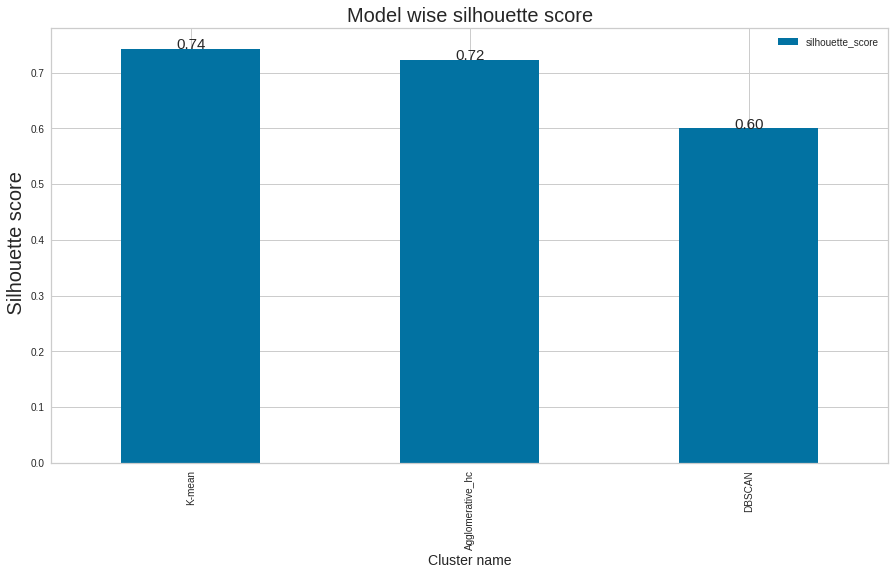

In [79]:
k_m2 = metrics.silhouette_score(df_pair_plot21, df_pair_plot21['Km_cluster'])
h_c2 = metrics.silhouette_score(df_pair_plot22, df_pair_plot22['hc_cluster'])
d_b2 = metrics.silhouette_score(df_pair_plot23, df_pair_plot23['dbscan_cluster'])

df_2 = pd.DataFrame({"Models":["K-mean","Agglomerative_hc","DBSCAN"],"silhouette_score":[k_m2,h_c2,round(d_b2,1)]})


fig,ax1= plt.subplots(1,1,figsize=(15,8)) 
x22=df_2.plot(x="Models", y=["silhouette_score"], kind="bar",ax=ax1)

plot_s(x22,"Cluster name"," Silhouette score","Model wise silhouette score")

 Conclusion--
 
We can see that in K mean clustering the distribution of the clusters are close to each other ,the silhouette_score for kmean and Agglomerative are so close to each other and we can also separate the rows as per similarity ,So we consider the k_men clustering as the best model 

In [80]:
#df_pair_plot21.to_csv("/content/drive/MyDrive/Untitled folder//toy_cluster.csv")

In [81]:
kk2 = toy_df.iloc[:,[0,1]]

In [82]:
# predicting values for k-mean
Kmeans_model2= KMeans(n_clusters = 5)
y_km2 = Kmeans_model2.fit_predict(kk2) 

In [83]:
 # dataframe for  predicted values
m2 = pd.DataFrame({"y_KM":y_km2})

In [84]:
# separating index based on clusters
first_index2 = m2[m2["y_KM"] == 0].index
second_index2 = m2[m2["y_KM"] == 1].index
third_index2 = m2[m2["y_KM"] == 2].index
fourth_index2 = m2[m2["y_KM"] == 3].index
fifth_index2 = m2[m2["y_KM"] == 4].index

In [85]:
toy_df.columns

Index(['overall', 'reviewPolarity'], dtype='object')

In [86]:
 # describe the data
toy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,10000.0,4.382293,0.549467,1.000000,4.000000,4.500000,4.800000,5.000000
reviewPolarity,10000.0,0.234128,0.114792,-0.264129,0.157226,0.226404,0.304159,0.833333


In [87]:
# printing values based on clusters

print(5*"******", "first_cluster",5*"******")
print(toy_df.iloc[first_index2,[0,1]].head(10))
print(5*"******", "second_cluster",5*"******")
print(toy_df.iloc[second_index2,[0,1]].head(10))
print(5*"******", "third_cluster",5*"******")
print(toy_df.iloc[third_index2,[0,1]].head(10))
print(5*"******", "Fourth_cluster",5*"******")
print(toy_df.iloc[fourth_index2,[0,1]].head(10))
print(5*"******", "Fifth_cluster",5*"******")
print(toy_df.iloc[fifth_index2,[0,1]].head(10))

****************************** first_cluster ******************************
                 overall  reviewPolarity
reviewerID                              
A2KD99RSG29MF5  4.666667        0.250043
A3BJPWUH2JIWCQ  4.600000        0.152055
A7O4YEZJOIP0Z   4.400000        0.203260
A3TFCGVQQR5PHV  4.600000        0.238643
A37SZP8JYAHF2F  4.500000        0.067361
A1G8USRY17IR1X  4.375000        0.165837
A1890F2IBKTR5D  4.500000        0.235648
APTL57YVNIY6Y   4.500000        0.033603
A1LFGOMRDJ79O3  4.625000        0.205524
AZR1RBKOE6XDN   4.600000        0.208927
****************************** second_cluster ******************************
                 overall  reviewPolarity
reviewerID                              
AQ0Y2DX63QGNB   3.375000        0.253299
A2313OA7XC7WQG  3.625000        0.122429
A14Z0Q1DU6CBJJ  3.812500        0.118205
ASVSGSUGVGOSC   3.714286        0.196809
A2HHAV29CZ1OIE  3.538462        0.230095
A1QOR694BY549Q  3.800000        0.098927
A24F1UX8ZT5IXY  3.800000   

Observations--

first_cluster = high sentiment,midium rating

second_cluster =  high sentiment ,high rating

third_cluster = low sentiment , medium rating 

fourth_cluster =  low sentiment , low rating

fifh_cluster =  medium sentiment,medium rating


 Visualize the data based on clusters

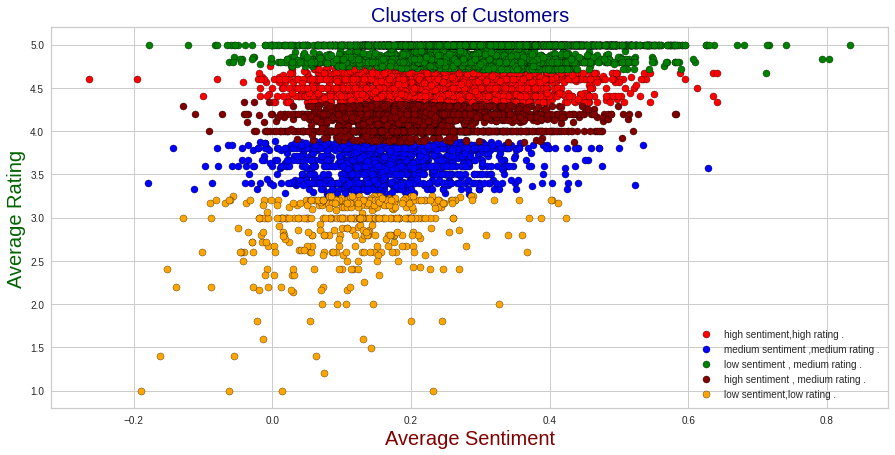

In [88]:
col = toy_df.columns
plt.figure(figsize=(15,7))
plt.scatter(toy_df.iloc[first_index2,1], toy_df.iloc[first_index2,0], s = 50, c = 'red', label = 'high sentiment,high rating .',edgecolors = "black")
plt.scatter(toy_df.iloc[second_index2, 1], toy_df.iloc[second_index2, 0], s = 50, c = 'blue', label = 'medium sentiment ,medium rating .',edgecolors = "black")
plt.scatter(toy_df.iloc[third_index2, 1], toy_df.iloc[third_index2, 0], s = 50, c = 'green', label = 'low sentiment , medium rating .',edgecolors = "black")
plt.scatter(toy_df.iloc[fourth_index2, 1], toy_df.iloc[fourth_index2, 0], s = 50, c = 'maroon', label = 'high sentiment , medium rating .',edgecolors = "black")
plt.scatter(toy_df.iloc[fifth_index2, 1], toy_df.iloc[fifth_index2, 0], s = 50, c = 'orange', label = 'low sentiment,low rating .',edgecolors = "black")

plt.title('Clusters of Customers',fontsize=20,color = "darkblue")
plt.ylabel("Average Rating",fontsize=20,color = "darkgreen")
plt.xlabel("Average Sentiment",fontsize=20,color = "maroon")
plt.legend()
plt.show()